**Import libraries:**

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

**Import file:**

In [246]:
customer = pd.read_csv('/content/customer_churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check column's datatypes:**

In [247]:
customer.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [248]:
customer.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **A) Data Manipulation:**

a. Find the total number of male customers.

In [249]:
sum(customer['gender']=="Male")

3555

b. Find the total number of customers whose Internet Service is 'DSL'.

In [250]:
sum(customer['InternetService']=="DSL")

2421

c. Extract all the Female senior citizens whose Payment Method is Mailed check
store the result in 'new_customer'

In [251]:
new_customer=customer[(customer['gender']=='Female') &
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in 'new_customer'

In [252]:
# Convert object column to numeric:
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')

new_customer=customer[(customer['tenure']<10) | (customer['TotalCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


### **B) Data Visualization:**

a. Build a pie-chart to show the distribution of customers would be churning out.

['No', 'Yes']
[5174, 1869]


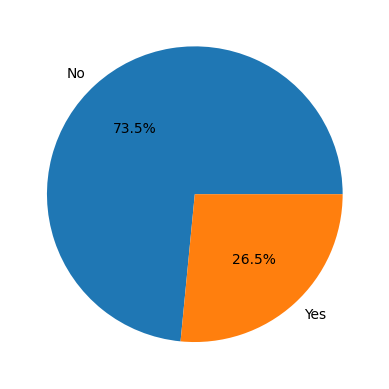

In [253]:
names = customer["Churn"].value_counts().keys().tolist()
sizes= customer["Churn"].value_counts().tolist()

print(names)
print(sizes)

plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

b. Build a bar-plot to show the distribution of 'Internet Service'

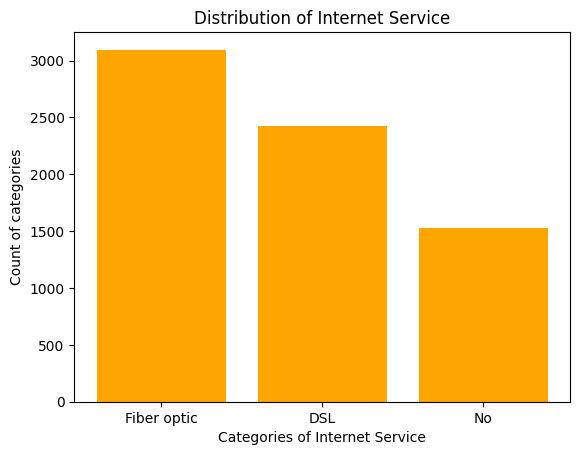

In [254]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),
        customer['InternetService'].value_counts().tolist(),color='orange')

plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

In [255]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
# Drop the customerID column from the dataset
customer = customer.drop(columns=['customerID'])

In [257]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Get all column names
columns_list = customer.columns.tolist()

# Loop through all columns and apply LabelEncoder if the column is of type 'object'
for column in columns_list:
    if customer[column].dtype == 'object':
        customer[column] = le.fit_transform(customer[column])

# Now all categorical columns are transformed to numeric values
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [258]:
customer.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [260]:
customer = customer.dropna(subset=['TotalCharges'])

### **C) Model Building:**

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:        
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.               
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function.                   
iii. Use ‘Adam’ as the optimization algorithm.            
iv. Fit the model on the train set, with number of epochs to be 150.           
v. Predict the values on the test set and build a confusion matrix.                     
vi. Plot the ‘Accuracy vs Epochs’ graph.

In [208]:
x=customer[['tenure']]
y=customer[['Churn']]

# Extract the target and feature columns.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [209]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [210]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [211]:
history=model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7542 - loss: 0.5990 - val_accuracy: 0.7578 - val_loss: 0.5156
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7553 - loss: 0.5143 - val_accuracy: 0.7578 - val_loss: 0.5159
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7470 - loss: 0.5103 - val_accuracy: 0.7578 - val_loss: 0.5147
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7527 - loss: 0.5149 - val_accuracy: 0.7578 - val_loss: 0.5133
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7533 - loss: 0.5114 - val_accuracy: 0.7578 - val_loss: 0.5133
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7418 - loss: 0.5209 - val_accuracy: 0.7578 - val_loss: 0.5142
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7452 - loss: 0.5185 - val_accuracy: 0.7578 - val_loss: 0.5151
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7465 - loss: 0.4997 - val_accu

In [212]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [213]:
np.mean(model.history.history['val_accuracy'])

0.7562748646736145

In [214]:
# Get the predicted probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Now you can use y_pred in the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1410,  139],
       [ 375,  186]])

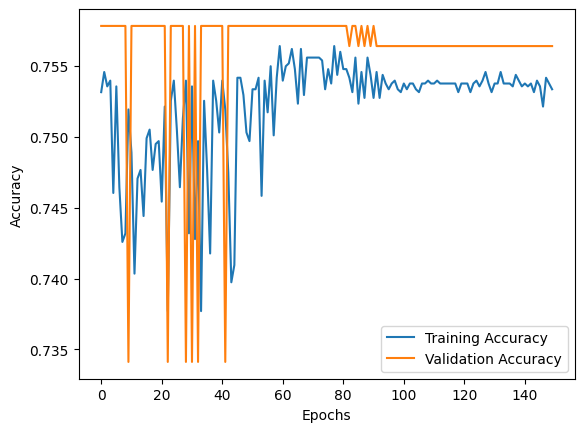

In [215]:
# Plot Accuracy Vs Epochs
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

b. Build the 2nd model using same target and feature variables:             
i. Add a drop-out layer after the input layer with drop-out value of 0.3        
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2      
iii. Predict the values on the test set and build a confusion matrix        
iv. Plot the ‘Accuracy vs Epochs’ graph

In [216]:
x1=customer[['tenure']]
y1=customer[['Churn']]

# Extract the target and feature columns.
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.30,random_state=42)

In [157]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train1, y_train1, epochs=150,validation_data=(x_test1,y_test1))

Epoch 1/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2819 - loss: 7.7554 - val_accuracy: 0.7341 - val_loss: 0.5161
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5913 - loss: 1.0812 - val_accuracy: 0.7341 - val_loss: 0.5468
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6611 - loss: 0.7911 - val_accuracy: 0.7341 - val_loss: 0.5245
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6747 - loss: 0.6944 - val_accuracy: 0.7341 - val_loss: 0.5152
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.6312 - val_accuracy: 0.7341 - val_loss: 0.5154
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7128 - loss: 0.5698 - val_accuracy: 0.7341 - val_loss: 0.5147
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7140 - loss: 0.5592 - val_accuracy: 0.7341 - val_loss: 0.5152
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7405 - loss: 0.5268 - val_accu

In [159]:
print(history.history.keys())

np.mean(model.history.history['val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


0.7341232299804688

In [160]:
# Get the predicted probabilities
y_pred_prob = model.predict(x_test1)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Now you can use the predicted classes for confusion matrix or other evaluations
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1549,    0],
       [ 561,    0]])

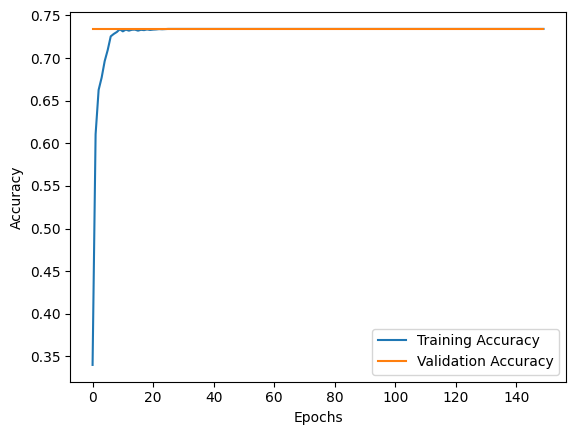

In [161]:
# Plot Accuracy Vs Epochs
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:          
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.              
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function                  
iii. Use ‘Adam’ as the optimization algorithm              
iv. Fit the model on the train set, with number of epochs to be 150         
v. Predict the values on the test set and build a confusion matrix         
vi. Plot the ‘Accuracy vs Epochs’ graph

In [261]:
x2=customer[['MonthlyCharges','tenure','TotalCharges']]#Features
y2=customer[['Churn']]#Target

# Extract the target and feature columns.
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.30,random_state=42)

In [262]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [263]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=150,validation_data=(x_test2,y_test2))

Epoch 1/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6775 - loss: 1.5380 - val_accuracy: 0.7175 - val_loss: 0.5331
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7317 - loss: 0.6505 - val_accuracy: 0.7787 - val_loss: 0.5963
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5650 - val_accuracy: 0.7678 - val_loss: 0.4884
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.5327 - val_accuracy: 0.7664 - val_loss: 0.4942
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7772 - loss: 0.5311 - val_accuracy: 0.7725 - val_loss: 0.4710
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7586 - loss: 0.5202 - val_accuracy: 0.7744 - val_loss: 0.8208
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.8678 - val_accuracy: 0.7744 - val_loss: 0.8272
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7728 - loss: 0.5711 - val_accu

In [264]:
print(history.history.keys())

np.mean(model.history.history['val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


0.7560537135601044

In [265]:
# Get the predicted probabilities
y_pred_prob = model.predict(x_test2)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Now you can use the predicted classes for confusion matrix or other evaluations
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, y_pred)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1446,  103],
       [ 352,  209]])

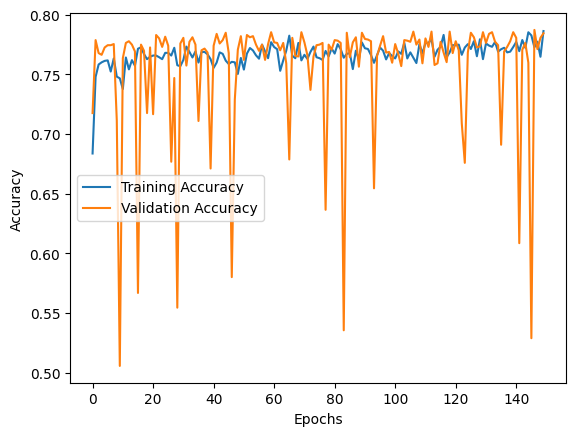

In [266]:
# Plot Accuracy Vs Epochs
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### **CONCLUSION:**

The first model gave us a mean validation accuracy of 75.62%, the second model had accuracy of 73.41% and third model had a mean validation accuracy of 75.60%.

The second model gave us the least accuracy because we added two dropout layers with high probabilities of dropout.

The third model’s accuracy being slightly lower than the first model suggests that some features or hyperparameter choices may have been less effective, leading to a small reduction in performance. It’s also important to note that the differences in accuracy can be attributed to the specific combination of hyperparameters used, such as optimizers, activation functions, and the number of epochs. If we tweek these hyperparameters we would get completely different accuracy values for all the three models.
